# Final Project Report

* Class: DS 5100
* Student Name: Christopher Lee
* Student Net ID: dkn7rm
* This URL: https://github.com/christopherpandalee/DS5100FP/blob/main/final%20project/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/christopherpandalee/DS5100FP/tree/main

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
class CreateDice:
    '''
    PURPOSE: Creates a dice. Initializes using faces listed in a numpy array.
    
    METHODS:
    - .change_weights(face2change, newWeight)
    - .roll_dice(rolls=1)
    - .show_current_state()
    '''
    
    def __init__(self, diefaces):
        '''
        PURPOSE: CreateDie class initializer. Throws error if input is not a numpy array 
        or the die does not have all different faces.
        
        INPUTS:
        diefaces - numpy array of list of die faces desired
        
        OUTPUTS:
        None
        
        Note: Instantiates die class as a pd.DataFrame
        '''
        # create default weights of 1
        weights = np.ones(len(diefaces))
        
        if type(diefaces) != np.ndarray:
            raise TypeError("Not a numpy array")
            
        if len(np.unique(diefaces)) != len(diefaces):
            raise ValueError("Need all unique values")
        
        # private attribute -> data frame of die faces as index and current weights of each die face
        self._createdDie = pd.DataFrame(weights, columns = ["weights"], index = diefaces)
        
    def change_weights(self, face2change, newWeight):
        '''
        PURPOSE: Changes the weight of a certain die face
        
        INPUTS:
        face2change - a matching face of instantiated die, data type dependent on die face
                    - throws error if this input does not match any of the faces of the die
        newWeight - int or float
                  - desired new weight for the die face being changed
                  - throws error if new weight is not int or float
        
        OUTPUT:
        None
        
        Note: This method will change the instantiated die dateframe.
        '''
        
        
        if (not any(face2change == self._createdDie.index)): # checks if dice face to change is in existing array of die faces
            raise IndexError("Die face to change not in existing die faces.")
        
        try:
            t_newWeight = float(newWeight) # tries to change weight to float
            # find index of dice face, then change corresponding weight in weight array
            self._createdDie.weights[self._createdDie.index == face2change] = t_newWeight
        except:
            return "New weight is not a number."
        
    def roll_dice(self, rolls = 1):
        '''
        PURPOSE: Rolls die the inputted amount of times. Defaults to 1 roll.
        
        INPUT: 
        rolls - int, desired number of rolls for die
        
        OUTPUT:
        list - list of roll results
        
        Note: weights of each die face is taken into consideration when rolling.
        '''
        # create probability array so the array of weights sums to 1 -> for use with np.random.choice function below
        prob_array = self._createdDie.weights / sum(self._createdDie.weights)
        # np.random.choice(array of die faces, # of rolls to do, probability array)
        # rolls the die the specified number of times, returns a list
        return np.random.choice(self._createdDie.index, rolls, p = prob_array).tolist()
    
    def show_current_state(self):
        '''
        PURPOSE: Shows current state of die by returning privately created die
        
        INPUT:
        None
        
        OUTPUT:
        pd.DataFrame - dateframe of current die
                     - index -> die faces
                     - columns -> weights
        '''
        return self._createdDie
                

        
class GamePlay:
    '''
    PURPOSE: Plays / rolls a list of dice. Initializes using a list of die class dice
    
    METHODS:
    - .play_dice(numrolls)
    - .show_results(size="wide")
    '''
    
    def __init__(self, listofdice):
        '''
        PURPOSE: GamePlay class initializer. Throws error if objects in inputted list are not die class objects 
                 or if the dice in the list have different faces.
        
        INPUT: 
        listofdice - list, list of die class dice
                   - dice in list need to have the same faces
        
        OUTPUT:
        None
        '''
        self.listofdice = listofdice
        
        # all() -> returns true if everything in list is true, else returns false
        # if not all true, ie if at least one is false, raise error
        # purpose: checks to make sure all dice in dice list are dice objects from CreateDice class
        if not all(isinstance(die, CreateDice) for die in self.listofdice):
            raise TypeError("Not a dice in list")
        
        # because all the dice need to have the same faces, it's arbitrary to pick the first one of the list
        # any dice needs to equal any other dice
        for die in self.listofdice:
            if (all(die.show_current_state().index != self.listofdice[0].show_current_state().index)):
                raise ValueError("All dice need the same faces")
    
    def play_dice(self, numrolls):
        '''
        PURPOSE: Rolls the dice in the list of dice the inputted amount of times. Stores results in a pd.DataFrame.
        
        INPUT:
        numrolls - int, number of rolls desired
        
        OUTPUT:
        None
        
        Note: Results of rolls are stored in a dataframe. Index -> rolls, columns -> each die in dice list
        '''
        self.numrolls = numrolls
        self.results = []
        
        # for each die in initilized list of dice
        # append the results of the number of rolls specified in this method
        for die in self.listofdice:
            self.results.append(die.roll_dice(numrolls))
        
        self.dicecolumns = [n for n in range(len(self.results))] # dice column names -> index of dice in list of dice
        self.resultsT = [list(i) for i in zip(*self.results)] # transposed the results list for data frame constructor
        self.diceindex = ["Roll #"+str(m) for m in range(1, len(self.resultsT)+1)] # list of index names
            
        # final data frame construction
        self._resultspd = pd.DataFrame(self.resultsT, index = self.diceindex, columns = self.dicecolumns)
        self._resultspd.index.name = "Rolls"
        
    def show_results(self, size = "wide"):
        '''
        PURPOSE: Shows the results of the rolls in a pd.DataFrame. Can be shown as a wide or narrow dataframe.
        
        INPUT:
        size - string, 2 options: "wide", "narrow"
             - defaults to "wide"
             - throws error if not one of the two options
             
        OUTPUT:
        pd.DataFrame - dataframe of the results of the rolls
                     - returns private results dataframe from .play_dice() method
        '''
        self.size = size
            
        try: #tries to convert input to string
            t_size = str(self.size)
        except:
            return "Narrow or wide only"
        
        # if string conversion is successful
        # if input is not equal to narrow or wide, throw error
        if (t_size.lower() != "narrow") & (t_size.lower() != "wide") :
            raise ValueError("Narrow or wide only")
            #raise TypeError("Narrow or wide data frame only")
        
        if (t_size.lower() == "narrow"):
            return pd.DataFrame(self._resultspd.stack(), columns = ["Results"])
        else:
            return self._resultspd
        
        
        
class AnalyzePlay:
    '''
    PURPOSE: Provides some methods for analyzing the results of rolling dice. Initializes using a GamePlay class object.
    
    METHODS:
    - .find_jackpots()
    - .find_face_counts()
    - .count_combo()
    - .count_perm()
    '''
    
    def __init__(self, game):
        '''
        PURPORSE: AnalyzePlay class object initializer. Throws error if input is not a GamePlay class object.
        
        INPUT:
        game - GamePlay class object
        
        OUTPUT:
        None
        '''
        self.game = game
        # checks to make sure input for initializer is a game object from GamePlay class
        if (not isinstance(game, GamePlay)):
            raise TypeError("Not a game object.")
            
    def find_jackpots(self):
        '''
        PURPOSE: Finds the number of rows that have all the same faces
        
        INPUT:
        None
        
        OUTPUT:
        int - returns the number of rows that have all the same faces
        '''
        # rolls -> the data frame of roll results from gameplay class
        rolls = self.game.show_results()
        # df.nuniquie(axis=1) checks the rows. if all values in row are same, returns 1
        # rolls[boolean] selects all rows that are the same value
        # len() -> number of jackpots
        num_jackpots = len(rolls[rolls.nunique(axis=1) == 1])
        return num_jackpots
    
    def find_face_counts(self):
        '''
        PURPOSE: Counts the faces that are rolled
        
        INPUT:
        None
        
        OUTPUT:
        pd.DataFrame - returns a dataframe of the counts of each die face
                     - index -> rolls
                     - columns -> faces
                     - cells -> count of rolls of each face
        '''
        # index for dataframe -> list comprehension using results dataframe indices from GamePlay class
        self.countsindex = ["Roll #"+str(m+1) for m in range(len(self.game.show_results().index))]
        # columns for dataframe -> uses index from one of the dice in the list of dice to get dice faces
        # since all the dice are the same, it doesn't matter which one to use
        self.countscol = [n for n in self.game.listofdice[0].show_current_state().index]
        counts = []
        # iterate over rows
        for rolls in self.game.show_results().index:
            # jfc this method chaining is out of control
            # dataframe from GamePlay class - iterate over rows using .loc - counts unique values - sorts unique values by index - add 0s for missing values
            # adding 0s method (.reindex) uses same list of dice faces from self.countscol
            sorted_counts = self.game.show_results().loc[rolls].value_counts().sort_index().reindex((self.game.listofdice[0].show_current_state().index), fill_value=0)
            counts.append(sorted_counts)
        # dataframe constructor
        self.counts = pd.DataFrame(counts, index = self.countsindex, columns = self.countscol)
        return self.counts
    
    def count_combo(self):
        '''
        PURPOSE: Find the number of combinations (order-independent) in the results dataframe
        
        INPUT:
        None
        
        OUTPUT:
        pd.Dataframe - returns a dataframe of the unique rows and the count of each time that happens
                     - index -> unique rows, order independent
                     - columns -> count of each unique row
        '''
        # magic
        # this was supposed to be a multi-indexed dataframe, but I couldn't figure it out
        # results data frame -> apply a sort to each row, by column (axis 1) -> count each sorted row
        return pd.DataFrame(self.game.show_results().apply(lambda row: sorted(row.values), axis=1).value_counts())
    
    def count_perm(self):
        '''
        PURPOSE: Find the number of permutations (order-dependent) in the results dataframe
        
        INPUT:
        None
        
        OUTPUT:
        pd.Dataframe - returns a dataframe of the unique rows and the count of each time that happens
                     - index -> unique rows, order dependent
                     - columns -> count of each unique row
        '''
        # also magic
        # this method chaining is out of control
        # results data frame -> groupby columns -> size returns each unique row -> reset index renames the newly created column of counts of unique rows
        return pd.DataFrame(self.game.show_results().groupby(list(self.game.show_results().columns)).size().reset_index(name="count"))
        
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import pandas as pd
import numpy as np
import unittest
from montecarlo import CreateDice, GamePlay, AnalyzePlay


class MCTestSuite(unittest.TestCase):
    
    def test_1_change_weights(self):
        testDice1 = CreateDice(np.array(["H", "T"]))
        expected_weights = [1, 6]
        testDice1.change_weights("T", 6)
        test_assert1 = all(expected_weights == testDice1.show_current_state().weights)
        self.assertTrue(test_assert1)
        
    def test_2_change_weights(self):
        testDice2 = CreateDice(np.array([1,2,3,4,5,6]))
        expected_weights = [1,1,1,6,1,1]
        testDice2.change_weights(4,6)
        test_assert2 = all(expected_weights == testDice2.show_current_state().weights)
        self.assertTrue(test_assert2)
        
    def test_3_roll_dice(self):
        testDice3 = CreateDice(np.array(["H", "T"]))
        expected_rolls = 10
        self.assertEqual(expected_rolls, len(testDice3.roll_dice(10)))

    def test_4_show_current_state(self):
        testDice4 = CreateDice(np.array(["H", "T"]))
        expected_index = ["H", "T"]
        test_assert4 = all(expected_index == testDice4.show_current_state().index)
        self.assertTrue(test_assert4)
        
    def test_5_show_current_state(self):
        testDice5 = CreateDice(np.array(["H", "T"]))
        expected_len = 2
        self.assertEqual(expected_len, len(testDice5.show_current_state()))
        
    def test_6_show_current_state(self):
        testDice6 = CreateDice(np.array(["H", "T"]))
        expected_weights = [1,1]
        test_assert6 = all(expected_weights == testDice6.show_current_state().weights)
        self.assertTrue(test_assert6)
        
    def test_7_play_dice(self):
        testDice7 = CreateDice(np.array(["H", "T"]))
        testGame7 = GamePlay([testDice7, testDice7, testDice7])
        testGame7.play_dice(10)
        expected_num_rolls = 10
        self.assertEqual(expected_num_rolls, len(testGame7.show_results().index))
        
    def test_8_play_dice(self):
        testDice8 = CreateDice(np.array(["H", "T"]))
        testGame8 = GamePlay([testDice8, testDice8, testDice8])
        testGame8.play_dice(5)
        expected_columns = 3
        self.assertEqual(expected_columns, len(testGame8.show_results().columns))
        
    def test_9_show_results(self):
        testDice9 = CreateDice(np.array(["H", "T"]))
        testGame9 = GamePlay([testDice9, testDice9, testDice9])
        testGame9.play_dice(5)
        expected_num_rolls = 5
        expected_columns = 3
        test_assert9_1 = expected_num_rolls == len(testGame9.show_results().index)
        test_assert9_2 = expected_columns == len(testGame9.show_results().columns)
        self.assertTrue(test_assert9_1 & test_assert9_2)
        
    def test_10_find_jackpots(self):
        testDice10 = CreateDice(np.array([1]))
        testGame10 = GamePlay([testDice10, testDice10, testDice10])
        testGame10.play_dice(10)
        testAnalyze10 = AnalyzePlay(testGame10)
        expected_jackpots = 10
        self.assertEqual(expected_jackpots, testAnalyze10.find_jackpots())
        
    def test_11_find_face_counts(self):
        testDice11 = CreateDice(np.array(["H", "T"]))
        testGame11 = GamePlay([testDice11, testDice11, testDice11])
        testGame11.play_dice(5)
        testAnalyze11 = AnalyzePlay(testGame11)
        expected_count = len(testGame11.show_results().columns)
        test_count = testAnalyze11.find_face_counts().sum(axis=1)[0]
        self.assertEqual(expected_count, test_count)
        
    def test_12_count_combo(self):
        pass
    
    def test_13_count_perm(self):
        pass
    
    def test_14_roll_dice(self):
        testDice14 = CreateDice(np.array(["H", "T"]))
        self.assertIsInstance(testDice14.roll_dice(1), list)
        
    def test_15_show_current_state(self):
        testDice15 = CreateDice(np.array(["H", "T"]))
        self.assertIsInstance(testDice15.show_current_state(), pd.DataFrame)
        
    def test_16_show_results(self):
        testDice16 = CreateDice(np.array(["H", "T"]))
        testGame16 = GamePlay([testDice16, testDice16, testDice16])
        testGame16.play_dice(5)
        self.assertIsInstance(testGame16.show_results(), pd.DataFrame)
        
    def test_17_find_jackpots(self):
        testDice17 = CreateDice(np.array(["H", "T"]))
        testGame17 = GamePlay([testDice17, testDice17, testDice17])
        testGame17.play_dice(5)
        testAnalyze17 = AnalyzePlay(testGame17)
        self.assertIsInstance(testAnalyze17.find_jackpots(), int)
            
    def test_18_find_face_counts(self):
        testDice18 = CreateDice(np.array(["H", "T"]))
        testGame18 = GamePlay([testDice18, testDice18, testDice18])
        testGame18.play_dice(5)
        testAnalyze18 = AnalyzePlay(testGame18)
        self.assertIsInstance(testAnalyze18.find_face_counts(), pd.DataFrame)

    def test_19_count_combo(self):
        testDice19 = CreateDice(np.array(["H", "T"]))
        testGame19 = GamePlay([testDice19, testDice19, testDice19])
        testGame19.play_dice(5)
        testAnalyze19 = AnalyzePlay(testGame19)
        self.assertIsInstance(testAnalyze19.count_combo(), pd.DataFrame)
    
    def test_20_count_perm(self):
        testDice20 = CreateDice(np.array(["H", "T"]))
        testGame20 = GamePlay([testDice20, testDice20, testDice20])
        testGame20.play_dice(5)
        testAnalyze20 = AnalyzePlay(testGame20)
        self.assertIsInstance(testAnalyze20.count_perm(), pd.DataFrame)

    

if __name__ == '__main__':
    unittest.main(verbosity = 3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [104]:
!python montecarlo_test.py

Module successfully imported
test_10_find_jackpots (__main__.MCTestSuite.test_10_find_jackpots) ... ok
test_11_find_face_counts (__main__.MCTestSuite.test_11_find_face_counts) ... ok
test_12_count_combo (__main__.MCTestSuite.test_12_count_combo) ... ok
test_13_count_perm (__main__.MCTestSuite.test_13_count_perm) ... ok
test_14_roll_dice (__main__.MCTestSuite.test_14_roll_dice) ... ok
test_15_show_current_state (__main__.MCTestSuite.test_15_show_current_state) ... ok
test_16_show_results (__main__.MCTestSuite.test_16_show_results) ... ok
test_17_find_jackpots (__main__.MCTestSuite.test_17_find_jackpots) ... ok
test_18_find_face_counts (__main__.MCTestSuite.test_18_find_face_counts) ... ok
test_19_count_combo (__main__.MCTestSuite.test_19_count_combo) ... ok
test_1_change_weights (__main__.MCTestSuite.test_1_change_weights) ... ok
test_20_count_perm (__main__.MCTestSuite.test_20_count_perm) ... ok
test_2_change_weights (__main__.MCTestSuite.test_2_change_weights) ... ok
test_3_roll_dice 

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [105]:
from montecarlosim.montecarlo import CreateDice, GamePlay, AnalyzePlay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [106]:
help("montecarlosim.montecarlo")

Help on module montecarlosim.montecarlo in montecarlosim:

NAME
    montecarlosim.montecarlo

CLASSES
    builtins.object
        AnalyzePlay
        CreateDice
        GamePlay
    
    class AnalyzePlay(builtins.object)
     |  AnalyzePlay(game)
     |  
     |  PURPOSE: Provides some methods for analyzing the results of rolling dice. Initializes using a GamePlay class object.
     |  
     |  METHODS:
     |  - .find_jackpots()
     |  - .find_face_counts()
     |  - .count_combo()
     |  - .count_perm()
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      PURPORSE: AnalyzePlay class object initializer. Throws error if input is not a GamePlay class object.
     |      
     |      INPUT:
     |      game - GamePlay class object
     |      
     |      OUTPUT:
     |      None
     |  
     |  count_combo(self)
     |      PURPOSE: Find the number of combinations (order-independent) in the results dataframe
     |      
     |      INPUT:
     | 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/christopherpandalee/DS5100FP/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [107]:
!pip install -e .

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/gpfs/tardis/home/dkn7rm/DS5100FP/final%20project
  Preparing metadata (setup.py) ... done
  Attempting uninstall: montecarlosim
    Found existing installation: montecarlosim 0.1
    Uninstalling montecarlosim-0.1:
      Successfully uninstalled montecarlosim-0.1
  Running setup.py develop for montecarlosim


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [126]:
faircoin = CreateDice(np.array(["H", "T"]))
unfaircoin = CreateDice(np.array(["H", "T"]))
unfaircoin.change_weights("H", 5)
unfaircoin.show_current_state()

,weights
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [130]:
fairgame = GamePlay([faircoin, faircoin])
fairgame.play_dice(1000)
fairgame.show_results().head()

,0,1
Rolls,,
Roll #1,H,T
Roll #2,T,H
Roll #3,T,T
Roll #4,H,H
Roll #5,H,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [131]:
unfairgame = GamePlay([unfaircoin, unfaircoin, faircoin])
unfairgame.play_dice(1000)
unfairgame.show_results().head()

,0,1,2
Rolls,,,
Roll #1,H,H,H
Roll #2,H,H,T
Roll #3,T,H,T
Roll #4,H,H,H
Roll #5,H,H,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [111]:
fairgameanalyze = AnalyzePlay(fairgame)
unfairgameanalyze = AnalyzePlay(unfairgame)
fairjackpots = fairgameanalyze.find_jackpots()
fairjackpots

513

In [112]:
unfairjackpots = unfairgameanalyze.find_jackpots()
unfairjackpots

359

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [113]:
fairgamerelfreq = fairjackpots / 1000
unfairgamerelfreq = unfairjackpots / 1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

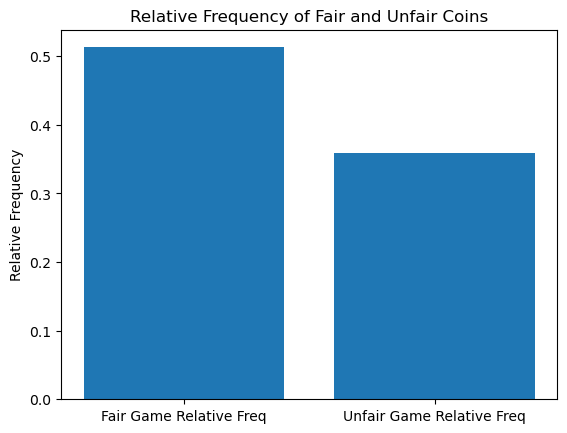

In [114]:
plt.bar(["Fair Game Relative Freq", "Unfair Game Relative Freq"], height = [fairgamerelfreq, unfairgamerelfreq]);
plt.ylabel("Relative Frequency");
plt.title("Relative Frequency of Fair and Unfair Coins");

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [115]:
die1 = CreateDice(np.array([1,2,3,4,5,6]))
die2 = CreateDice(np.array([1,2,3,4,5,6]))
die3 = CreateDice(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [132]:
die3.change_weights(6, 5)
die3.show_current_state()

,weights
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [133]:
die2.change_weights(1, 5)
die2.show_current_state()

,weights
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [134]:
game2 = GamePlay([die1, die1, die1, die1, die1])
game2.play_dice(10000)
game2.show_results().head()

,0,1,2,3,4
Rolls,,,,,
Roll #1,5,6,6,6,3
Roll #2,6,4,3,2,3
Roll #3,3,6,1,1,2
Roll #4,6,3,3,2,2
Roll #5,3,2,2,5,2


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [135]:
game3 = GamePlay([die2, die3, die1, die1, die1])
game3.play_dice(10000)
game3.show_results().head()

,0,1,2,3,4
Rolls,,,,,
Roll #1,6,6,4,6,6
Roll #2,5,6,3,2,3
Roll #3,1,1,5,2,6
Roll #4,2,6,1,4,6
Roll #5,3,1,1,4,5


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [136]:
game2analyze = AnalyzePlay(game2)
game3analyze = AnalyzePlay(game3)
game2relfreq = game2analyze.find_jackpots() / 10000
game3relfreq = game3analyze.find_jackpots() / 10000
game2relfreq, game3relfreq

(0.0005, 0.0006)

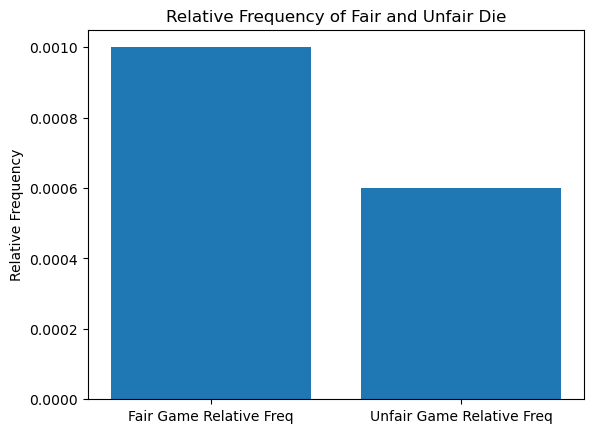

In [121]:
plt.bar(["Fair Game Relative Freq", "Unfair Game Relative Freq"], height = [game2relfreq, game3relfreq]);
plt.ylabel("Relative Frequency");
plt.title("Relative Frequency of Fair and Unfair Die");

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [137]:
engletters = pd.read_csv("english_letters.txt", sep=' ', header = None)
alphadie = CreateDice(np.array(list(engletters[0])))
for letter in engletters.index:
    alphadie.change_weights(engletters[0][letter], engletters[1][letter])
    
alphadie.show_current_state()

,weights
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0
L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [138]:
game4 = GamePlay([alphadie, alphadie, alphadie, alphadie])
game4.play_dice(1000)
game4.show_results().head()

,0,1,2,3
Rolls,,,,
Roll #1,D,N,I,R
Roll #2,S,R,F,G
Roll #3,L,P,E,C
Roll #4,L,F,R,E
Roll #5,A,A,A,A


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [141]:
scrabblewords = pd.read_csv("scrabble_words.txt", header = None)
game4analyze = AnalyzePlay(game4)
playedwords4 = (game4analyze.count_perm()[0] + game4analyze.count_perm()[1] + game4analyze.count_perm()[2] + game4analyze.count_perm()[3]).to_frame()
isinscrabble4 = playedwords4[0].isin(scrabblewords[0])
realwordcount4 = sum(isinscrabble4[isinscrabble4 == True])
realwordcount4

48

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [140]:
game5 = GamePlay([alphadie, alphadie, alphadie, alphadie, alphadie])
game5.play_dice(1000)
game5analyze = AnalyzePlay(game5)
playedwords5 = (game5analyze.count_perm()[0] + game5analyze.count_perm()[1] + game5analyze.count_perm()[2] + game5analyze.count_perm()[3] + game5analyze.count_perm()[4]).to_frame()
isinscrabble5 = playedwords5[0].isin(scrabblewords[0])
realwordcount5 = sum(isinscrabble5[isinscrabble5 == True])
realwordcount5

8

Response: The game with 4 alphabet dice produced 48 words that are in the Scrabble words file. The game with 5 alphabet dice produced 8 words that are in the Scrabble words file. The game with 4 dice produced more words that match in the Scrabble words file.